In [16]:
!pip install -U gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import random
import keras
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adamax                ##cannot import it, does not work but it is solved
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("Bars_Bro.txt", sep='\t',names=['text'])

In [6]:
data.head()

,text
0,Heartbreak drowned sorrows in a large steak
1,Why you always all on my back?
2,Why you gotta do me like that?
3,Why you gotta act like a bitch when I'm with you?
4,Baby girl I'm blue


In [7]:
##Size of the dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (172103, 1)


In [8]:
#take this from assignment 3
##splitting the data into a train and validation set by splitting it into 80% fro training and 20% for validation 

training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 137682
No. of testing examples: 34421


In [9]:
data.describe()

,text
count,172103
unique,140245
top,Yeah
freq,151


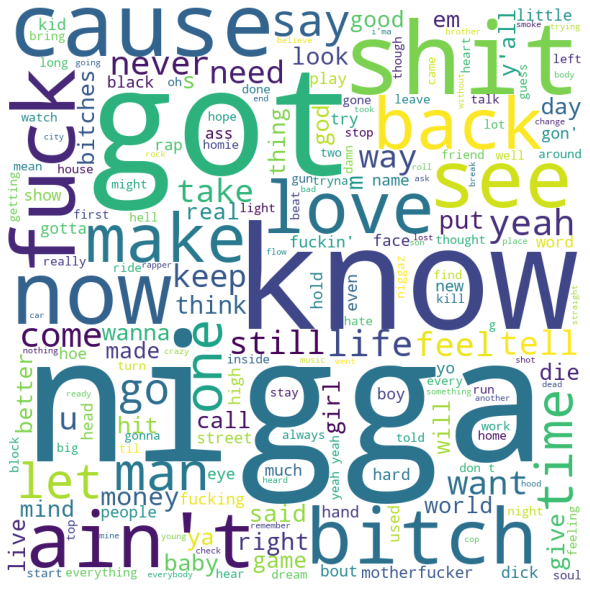

In [15]:
#text_file = "Bars_bro.txt"
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

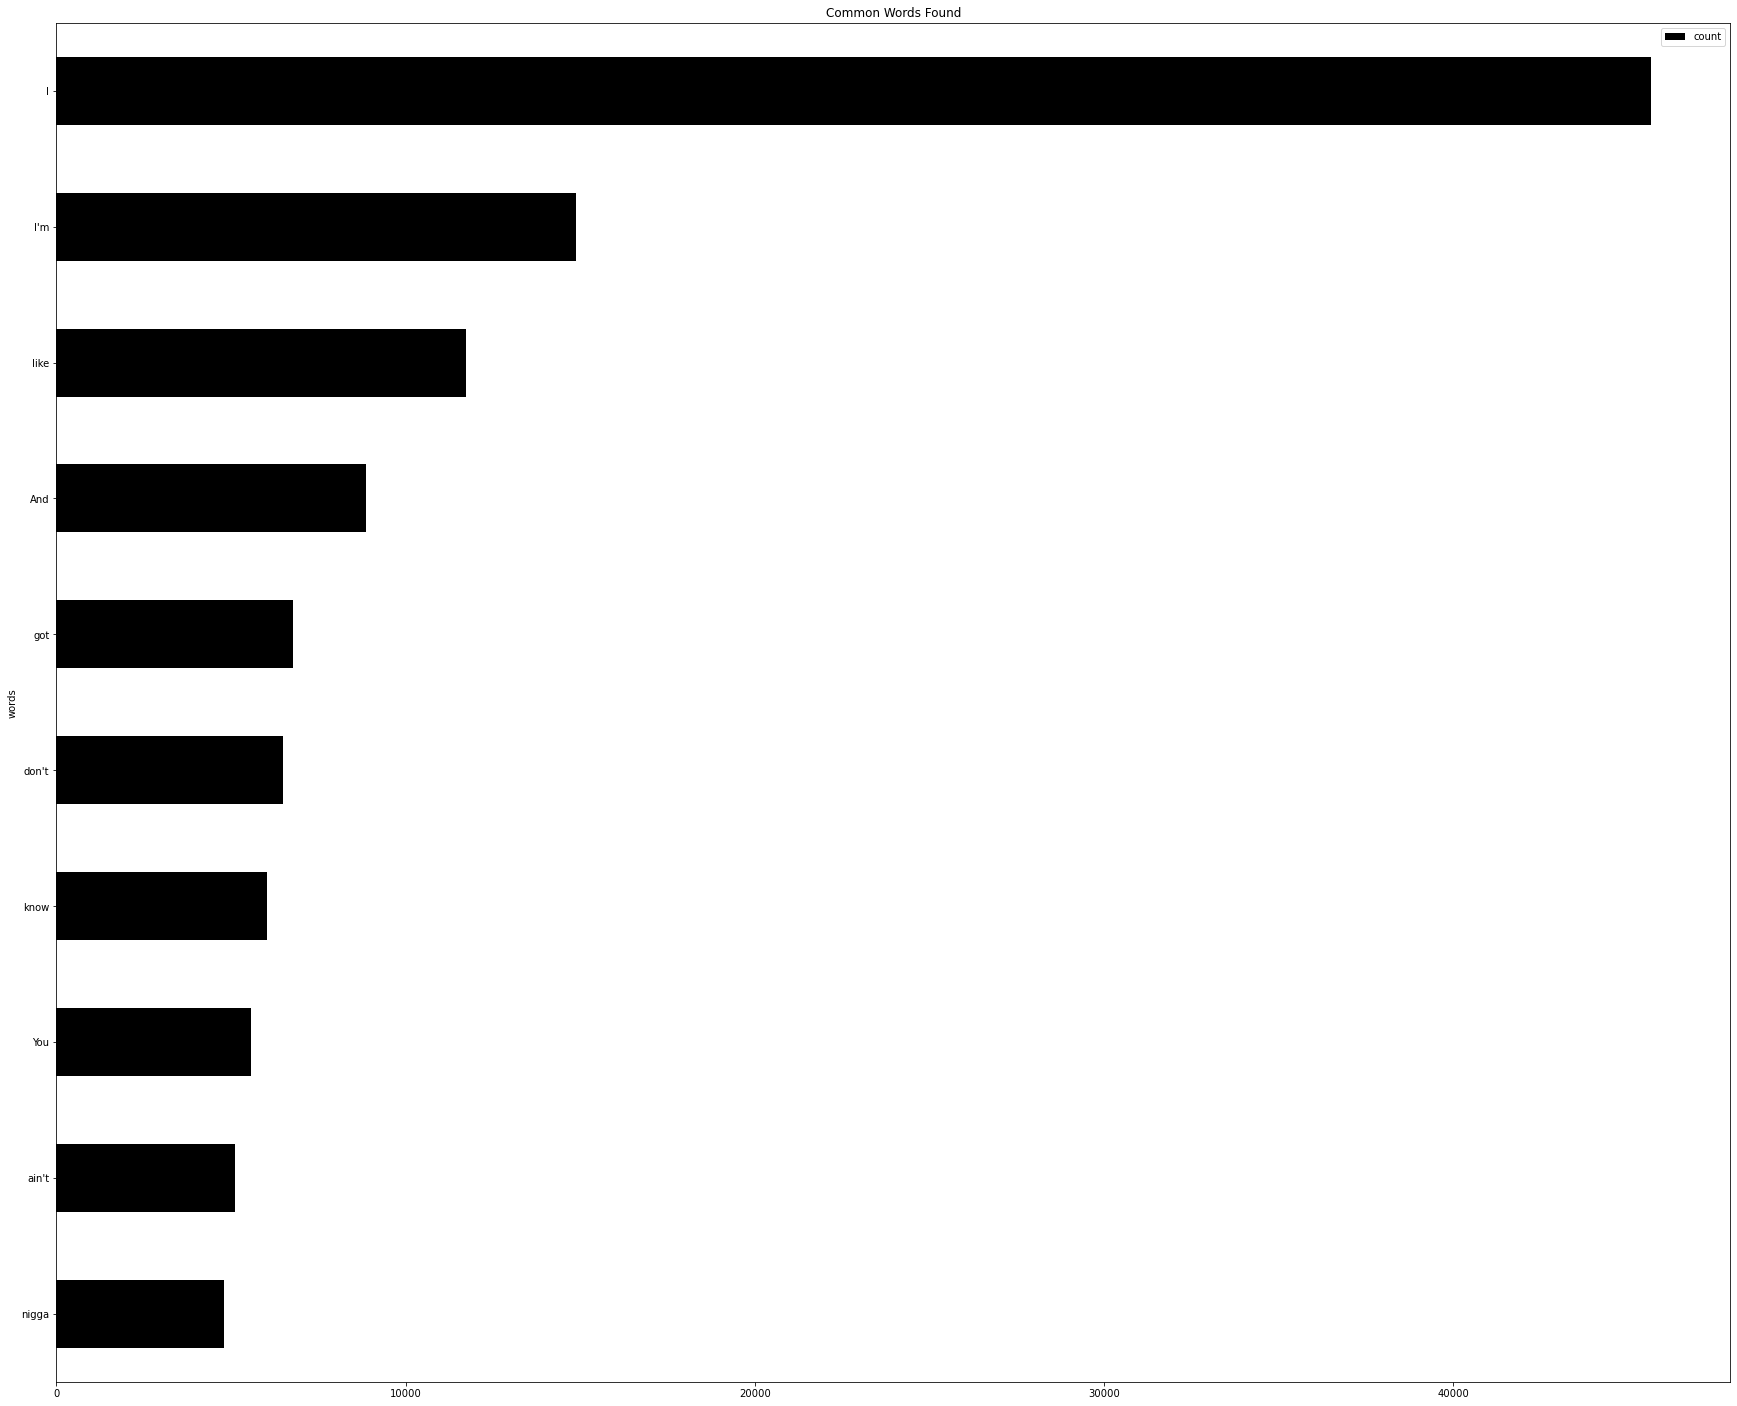

In [1]:
text_file = "Bars_Bro.txt"

from collections import Counter
from gensim.parsing.preprocessing import remove_stopwords
import matplotlib.pyplot as plt
import pandas as pd

cnt = Counter()
bars = open(text_file, "r", encoding='utf-8').read()
filtered_bars = remove_stopwords(bars)

for text in filtered_bars.split():
    cnt[text] += 1


word_freq = pd.DataFrame(cnt.most_common(10),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(30,25))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="black")
ax.set_title("Common Words Found")
plt.show()